## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [10] : [Hierarchical Clustering] </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Gempar Bambang Godata"
myNIM = "00000056133"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000056133
Start: 		2023-05-04 21:54:37.272368
Device ID: 	96fac3e3-ea8b-11ed-b049-f395043e404b


### Deskripsi Singkat Dataset:

1. Forest Fires Dataset, berisi kumpulan data mengenai peristiwa kebakaran hutan dan kandungan asap yang dihasilkan
2. Wine Dataset, dataset yang berisi kumpulan berbagai macam kandungan yang ada pada masing - masing wine berbeda


---

### Dataset yang diambil dari repositori:

1. [Forest Fires Dataset] – sumber : [https://www.kaggle.com/datasets/ryanholbrook/dl-course-data?select=forestfires.csv]
2. [Wine Dataset] – sumber : [https://www.kaggle.com/datasets/ryanholbrook/dl-course-data?select=red-wine.csv]

### Hasil kerja

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Modul

In [3]:
df = pd.read_csv('german_credit_data.csv')

In [4]:
df.shape

(1000, 10)

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [7]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [9]:
numerical = ['Credit amount', 'Age', 'Duration']
categorical = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose' ]
unused = ['Unnamed: 0']
df = df.drop(columns = unused)
df.shape

(1000, 9)

In [10]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

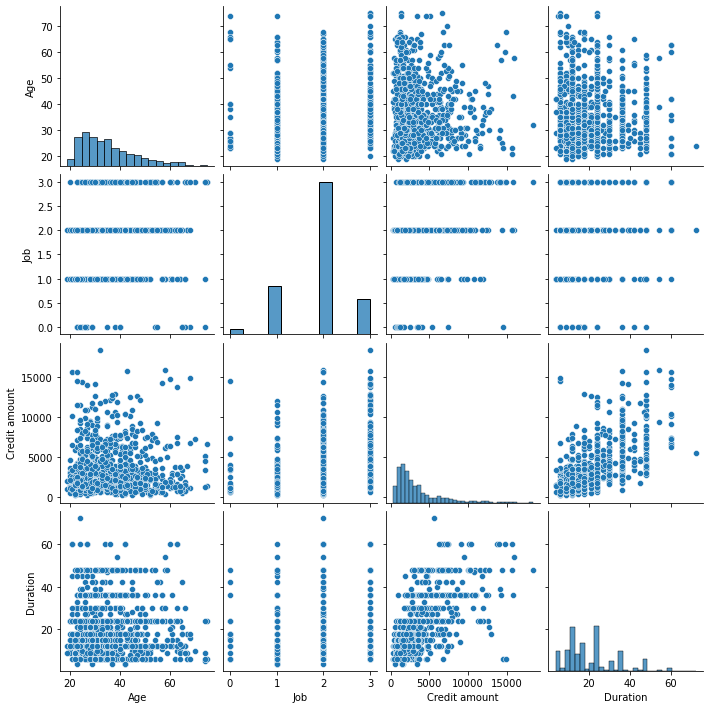

In [11]:
sns.pairplot(df)

<function matplotlib.pyplot.show(close=None, block=None)>

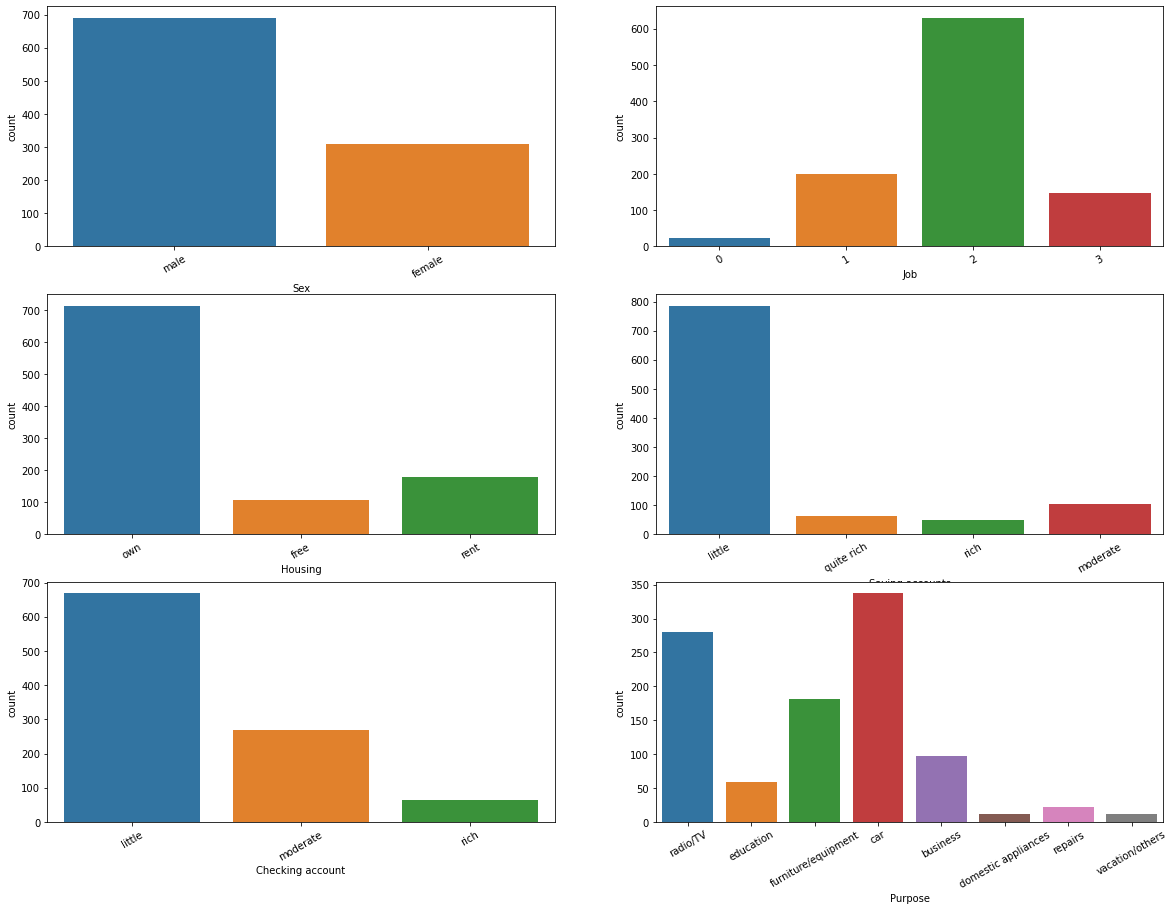

In [12]:
fig = plt.figure(figsize=(20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show

<AxesSubplot:>

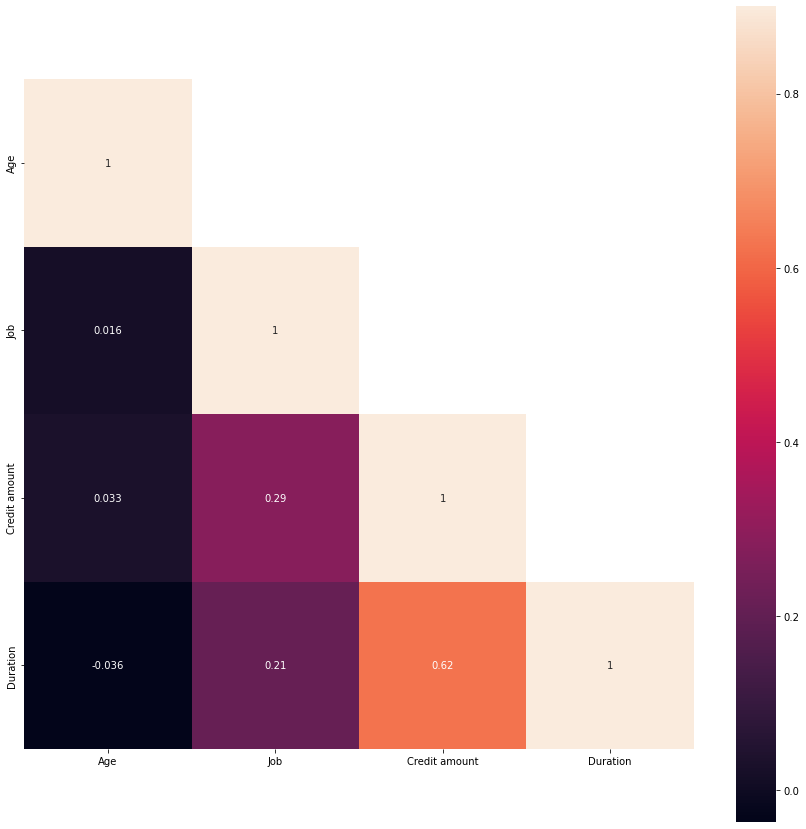

In [13]:
#create correlation
corr = df.corr(method = 'pearson')
#convert correLation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [14]:
df_cluster = pd.DataFrame()
df_cluster['Credit amount'] = df['Credit amount']
df_cluster['Age'] = df['Age']
df_cluster['Duration'] = df['Duration']
df_cluster['Job'] = df['Job']
df_cluster.head()

,Credit amount,Age,Duration,Job
0,1169,67,6,2
1,5951,22,48,2
2,2096,49,12,1
3,7882,45,42,2
4,4870,53,24,2


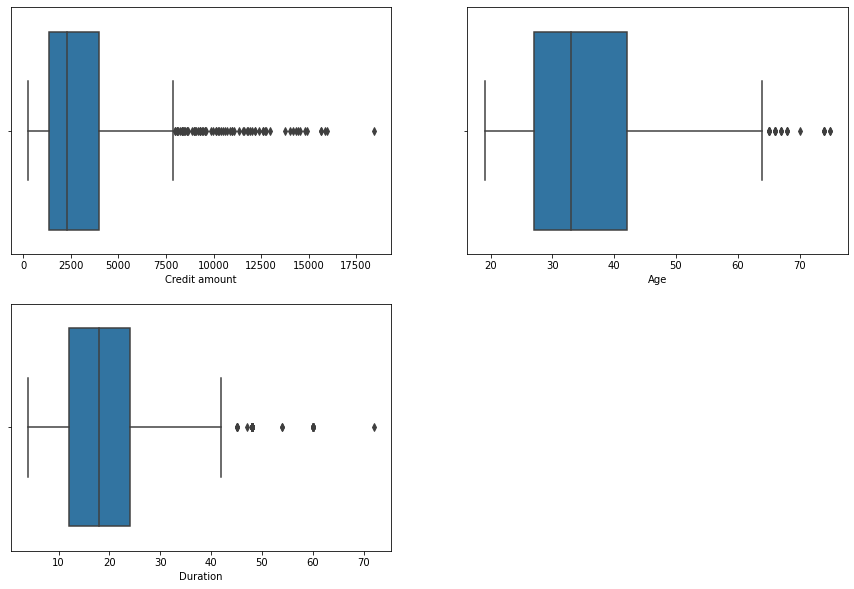

In [15]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


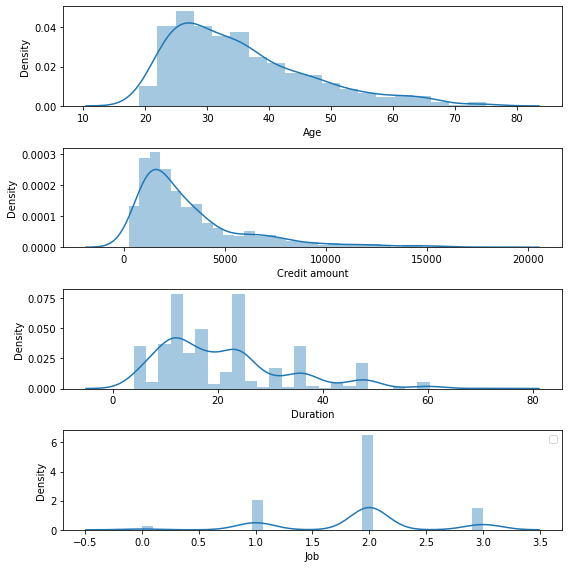

In [16]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df["Age"], ax=ax1)
sns.distplot(df["Credit amount"],ax=ax2)
sns.distplot(df["Duration"],ax=ax3)
sns.distplot(df["Job"],ax=ax4)
plt.tight_layout()
plt.legend()

#### Feature Engineering

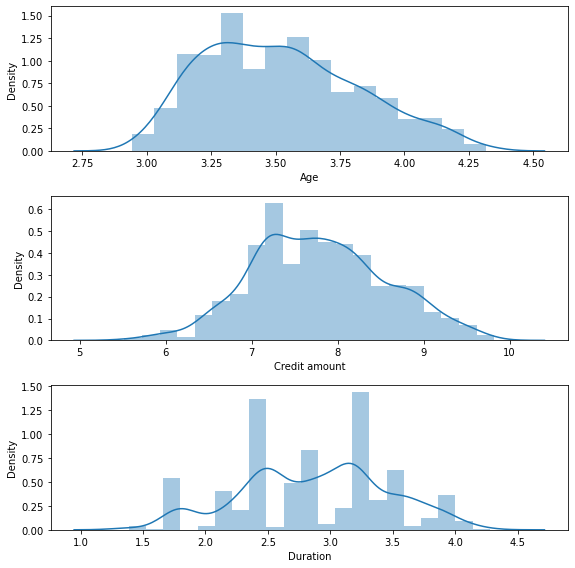

In [17]:
df_cluster_log = np.log(df_cluster[['Age', 'Credit amount', 'Duration']])

fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
sns.distplot(df_cluster_log["Age"], ax=ax1)
sns.distplot(df_cluster_log["Credit amount"], ax=ax2)
sns.distplot(df_cluster_log["Duration"],ax=ax3)
plt.tight_layout()

In [18]:
df_cluster_log.head()

,Age,Credit amount,Duration
0,4.204693,7.063904,1.791759
1,3.091042,8.691315,3.871201
2,3.891820,7.647786,2.484907
3,3.806662,8.972337,3.737670
4,3.970292,8.490849,3.178054


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

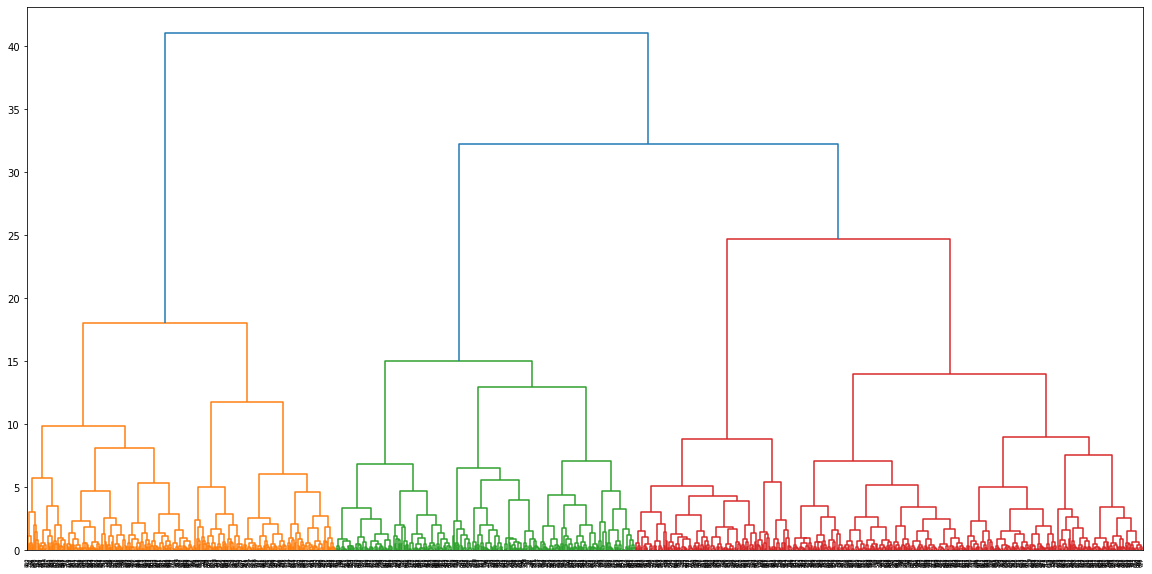

In [20]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierarchical Agglomerative Clustering


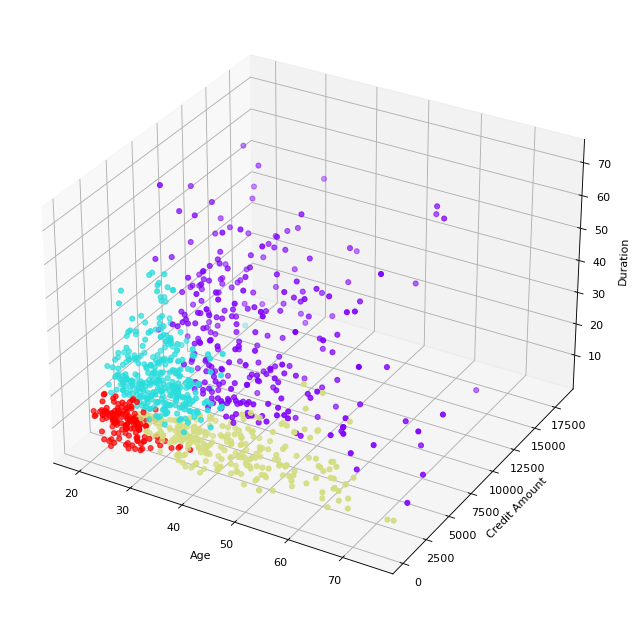

In [21]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d" )

ax. scatter3D(df_cluster['Age'],df_cluster['Credit amount'],df_cluster['Duration'],c=hac_labels, cmap='rainbow')
xLabel = ax.set_xlabel('Age',linespacing=3.2)
yLabel = ax.set_ylabel('Credit Amount', linespacing=3.1)
zLabel = ax.set_zlabel('Duration', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [22]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Credit amount,Age,Duration,Job
Cluster,,,,
0,6477.0,40.4,32.0,2.2
1,2748.0,28.8,23.6,1.9
2,1644.1,44.0,11.7,1.7
3,1231.5,25.1,10.6,1.7


### The Dendogram

In [23]:
#The Dendrogram using WholesaleCustomer dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv('Wholesale_customers_data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [25]:
from sklearn.preprocessing import normalize
data_scaled=normalize(data)
data_scaled=pd.DataFrame (data_scaled,columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


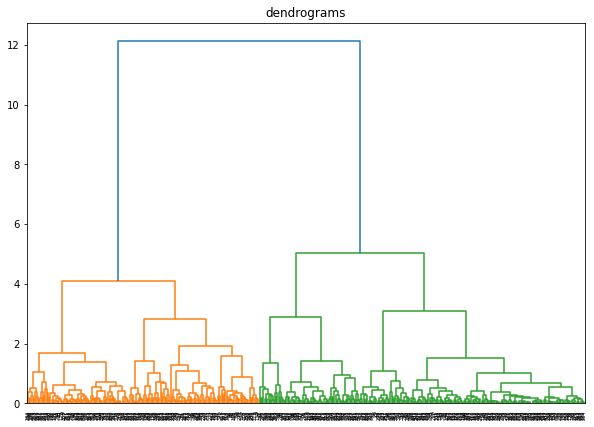

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled, method='ward'))

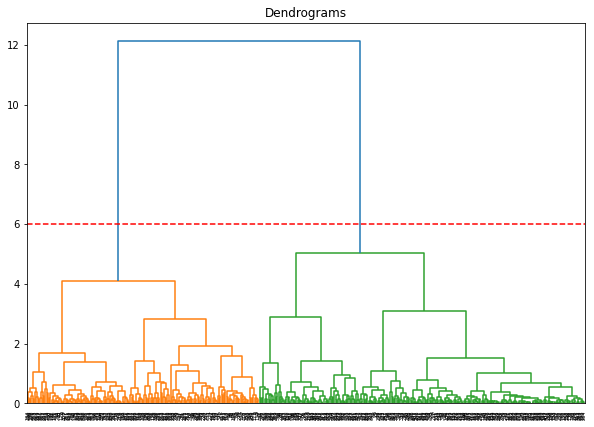

In [27]:
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r',linestyle='--')

In [28]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                               linkage = 'ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

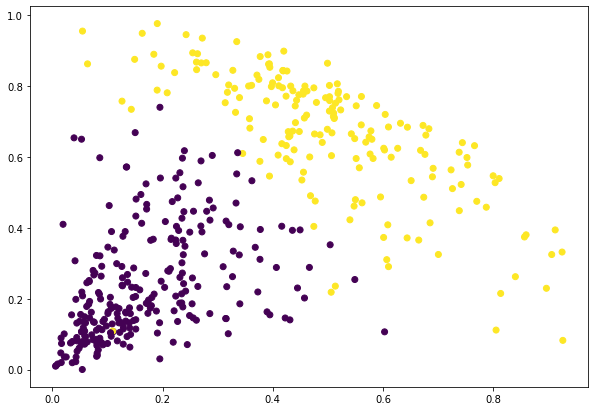

In [29]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'],c=cluster.labels_)

### Dataset Sendiri

In [30]:
df = pd.read_csv('forestfires.csv')

In [31]:
df.shape

(517, 13)

In [32]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [34]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [35]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [36]:
numerical = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH']
categorical = ['month', 'day']
unused = ['wind', 'rain', 'area']

In [37]:
df = df.drop(columns = unused)
df.shape

(517, 10)

In [38]:
for cat in categorical:
    df[cat] = df[cat].fillna(df[cat].mode().values[0])

In [39]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
dtype: int64

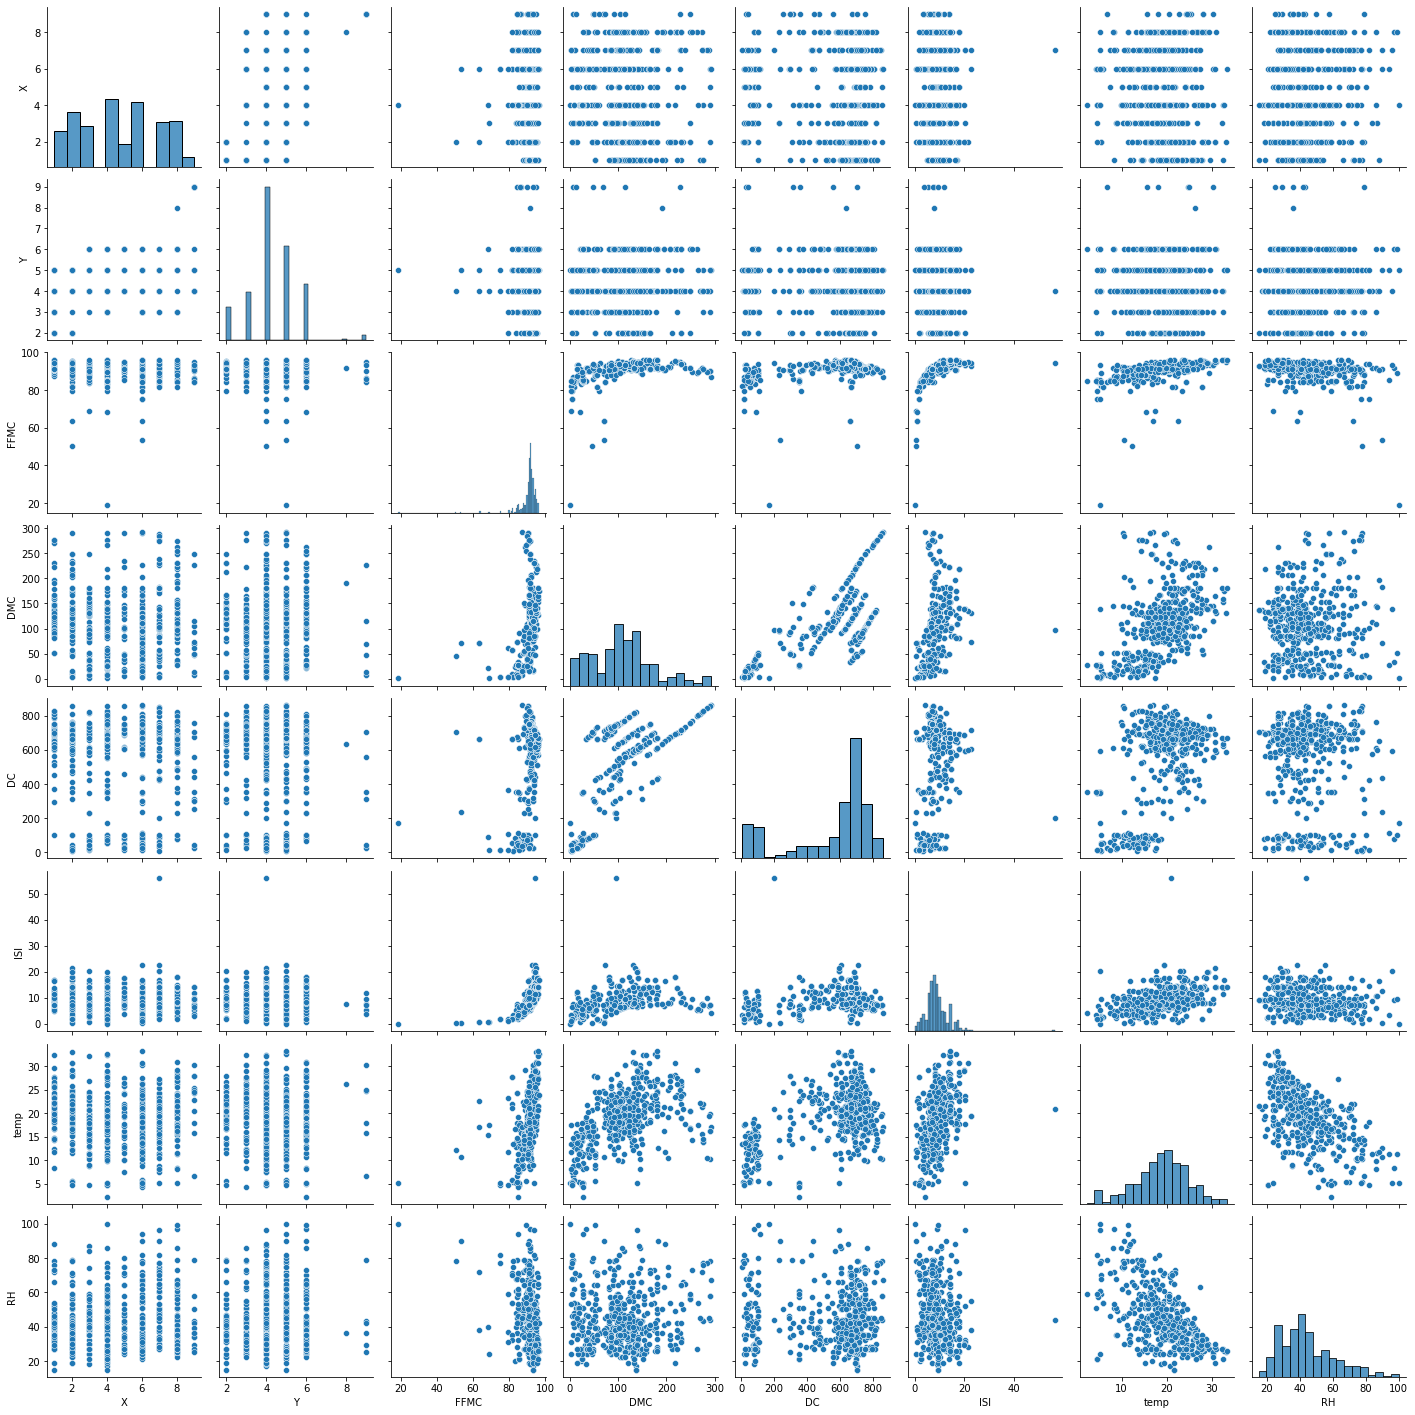

In [40]:
sns.pairplot(df)

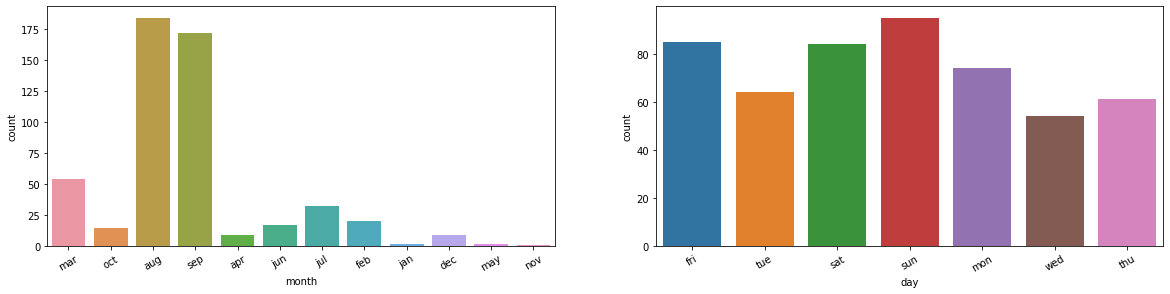

In [41]:
fig = plt.figure(figsize = (20,15))
axes = 320
for cat in categorical:
    axes += 1
    fig.add_subplot(axes)
    sns.countplot(data = df, x = cat)
    plt.xticks(rotation=30)
plt.show()

### Correlation

<AxesSubplot:>

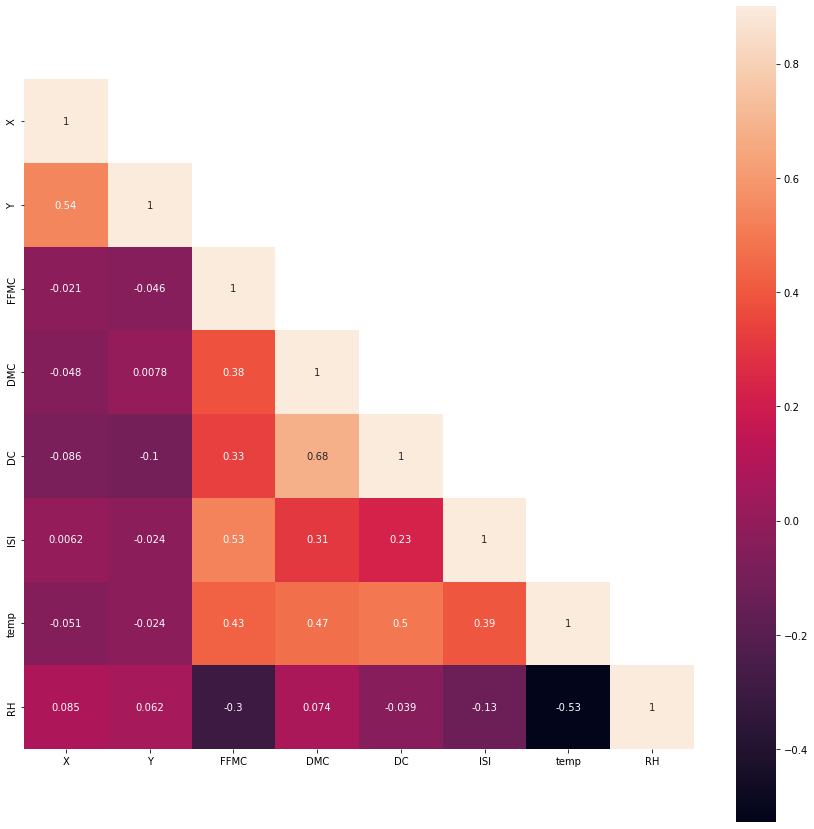

In [42]:
#Create correlation
corr = df.corr(method = 'pearson')

#Convert correlation to numpy array
mask = np.array(corr)

#To mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [43]:
df_cluster = pd.DataFrame()
df_cluster['X'] = df['X']
df_cluster['Y'] = df['Y']
df_cluster['FFMC'] = df['FFMC']
df_cluster['DMC'] = df['DMC']
df_cluster['DC'] = df['DC']
df_cluster['ISI'] = df['ISI']
df_cluster['temp'] = df['temp']
df_cluster['RH'] = df['RH']
df_cluster.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH
0,7,5,86.2,26.2,94.3,5.1,8.2,51
1,7,4,90.6,35.4,669.1,6.7,18.0,33
2,7,4,90.6,43.7,686.9,6.7,14.6,33
3,8,6,91.7,33.3,77.5,9.0,8.3,97
4,8,6,89.3,51.3,102.2,9.6,11.4,99


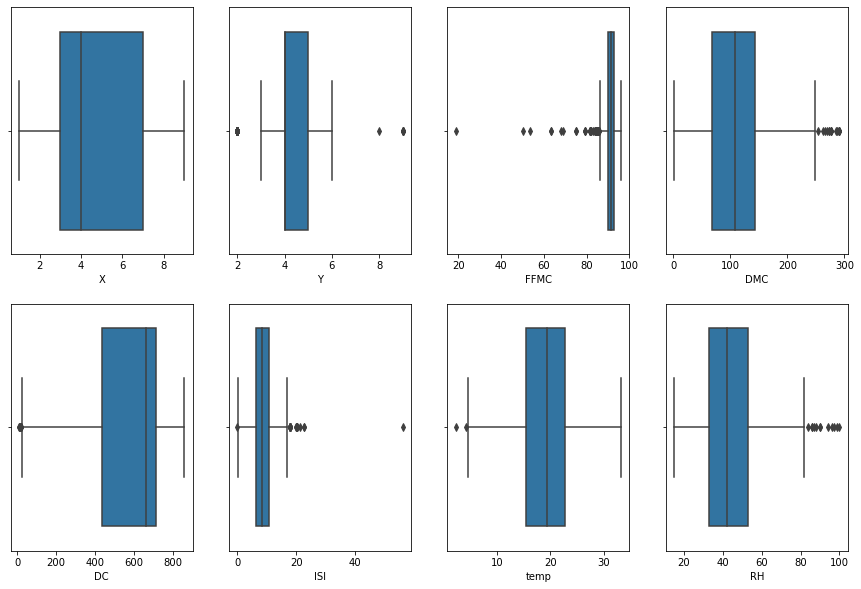

In [44]:
fig = plt.figure(figsize = (15,10))
axes = 240
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = df, x = num)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


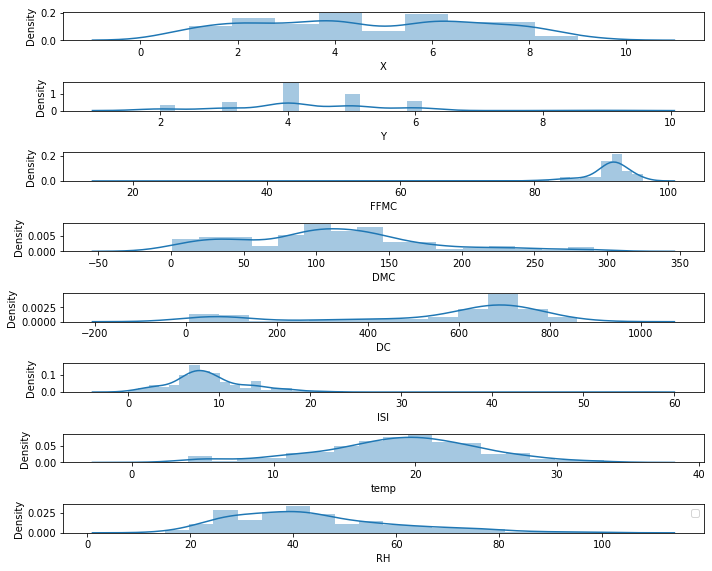

In [45]:
import warnings
warnings.filterwarnings("ignore")

fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(8, 1, figsize=(10,8))
sns.distplot(df["X"], ax=ax1)
sns.distplot(df["Y"], ax=ax2)
sns.distplot(df["FFMC"], ax=ax3)
sns.distplot(df["DMC"], ax=ax4)
sns.distplot(df["DC"], ax=ax5)
sns.distplot(df["ISI"], ax=ax6)
sns.distplot(df["temp"], ax=ax7)
sns.distplot(df["RH"], ax=ax8)
plt.tight_layout()
plt.legend()

### Feature Engineering

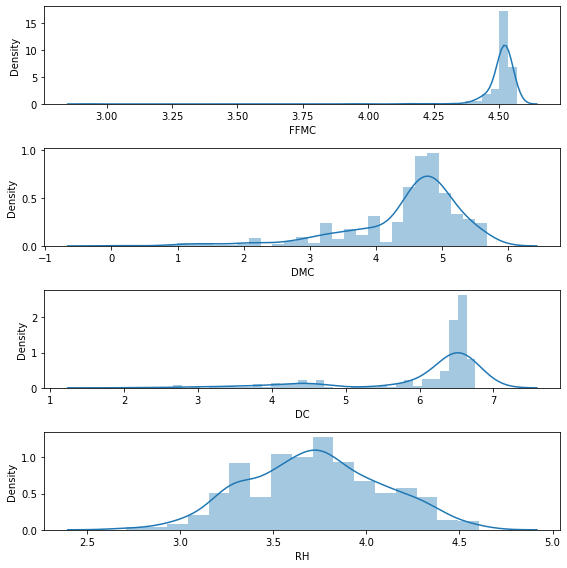

In [46]:
df_cluster_log = np.log(df_cluster[['FFMC', 'DMC', 'DC', 'RH']])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(8,8))
sns.distplot(df_cluster_log["FFMC"], ax=ax1)
sns.distplot(df_cluster_log["DMC"], ax=ax2)
sns.distplot(df_cluster_log["DC"], ax=ax3)
sns.distplot(df_cluster_log["RH"], ax=ax4)
plt.tight_layout()

In [47]:
df_cluster_log.head()

,FFMC,DMC,DC,RH
0,4.456670,3.265759,4.546481,3.931826
1,4.506454,3.566712,6.505934,3.496508
2,4.506454,3.777348,6.532189,3.496508
3,4.518522,3.505557,4.350278,4.574711
4,4.492001,3.937691,4.626932,4.595120


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

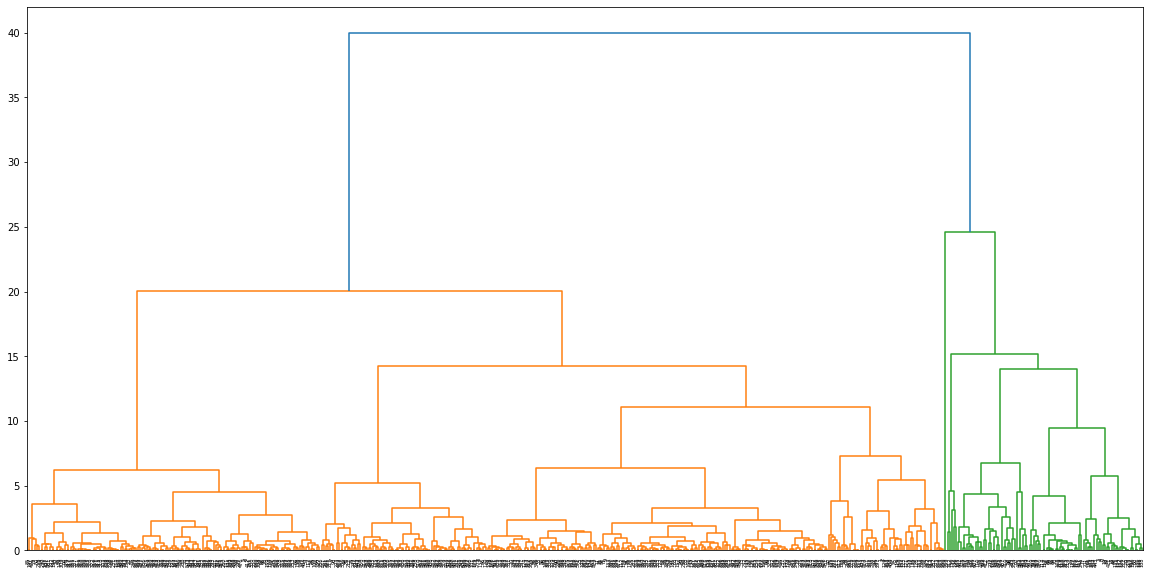

In [49]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

Hierarchical Agglomerative Clustering


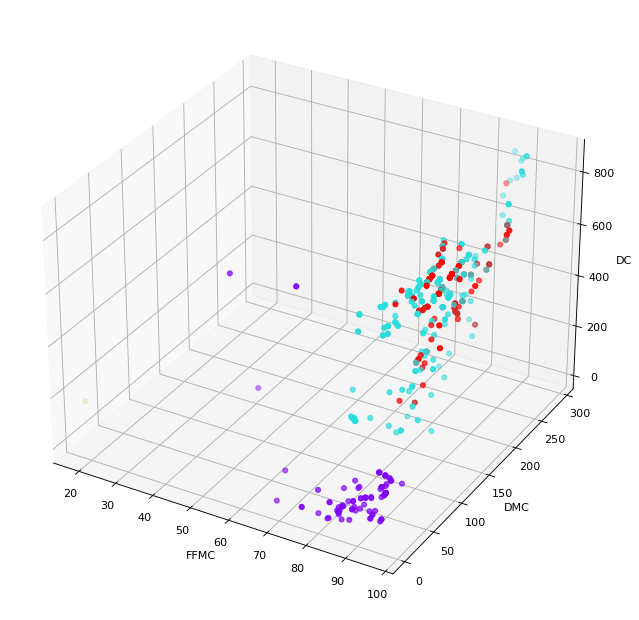

In [50]:
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
model = AgglomerativeClustering(n_clusters=4)
model.fit(cluster_scaled)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['FFMC'], df_cluster['DMC'], df_cluster['DC'], c=hac_labels, cmap='rainbow')

xlabel = ax.set_xlabel('FFMC', linespacing=3.2)
ylabel = ax.set_ylabel('DMC', linespacing=3.1)
zlabel = ax.set_zlabel('DC', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

In [51]:
df_clustered_hac = df_cluster.assign(Cluster=hac_labels)
grouped_hac = df_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,X,Y,FFMC,DMC,DC,ISI,temp,RH
Cluster,,,,,,,,
0,4.9,4.4,86.1,27.9,87.4,5.7,12.4,46.7
1,4.7,4.3,91.2,126.7,640.0,9.3,18.4,50.4
2,4.0,5.0,18.7,1.1,171.4,0.0,5.2,100.0
3,4.5,4.3,92.9,133.6,663.2,10.8,24.3,29.3


### Dendrogram

In [52]:
# The Dendrogram using WholesaleCustomer dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data = pd.read_csv('red-wine.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled,columns = data.columns)
data_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728
1,0.106989,0.012071,0.000000,0.035663,0.001344,0.342913,0.919006,0.013673,0.043893,0.009327,0.134422,0.068583
2,0.134949,0.013149,0.000692,0.039793,0.001592,0.259517,0.934261,0.017249,0.056402,0.011246,0.169551,0.086506
3,0.173611,0.004340,0.008681,0.029452,0.001163,0.263517,0.930059,0.015470,0.048983,0.008991,0.151910,0.093006
4,0.193478,0.018302,0.000000,0.049677,0.001987,0.287602,0.888952,0.026088,0.091771,0.014642,0.245769,0.130728


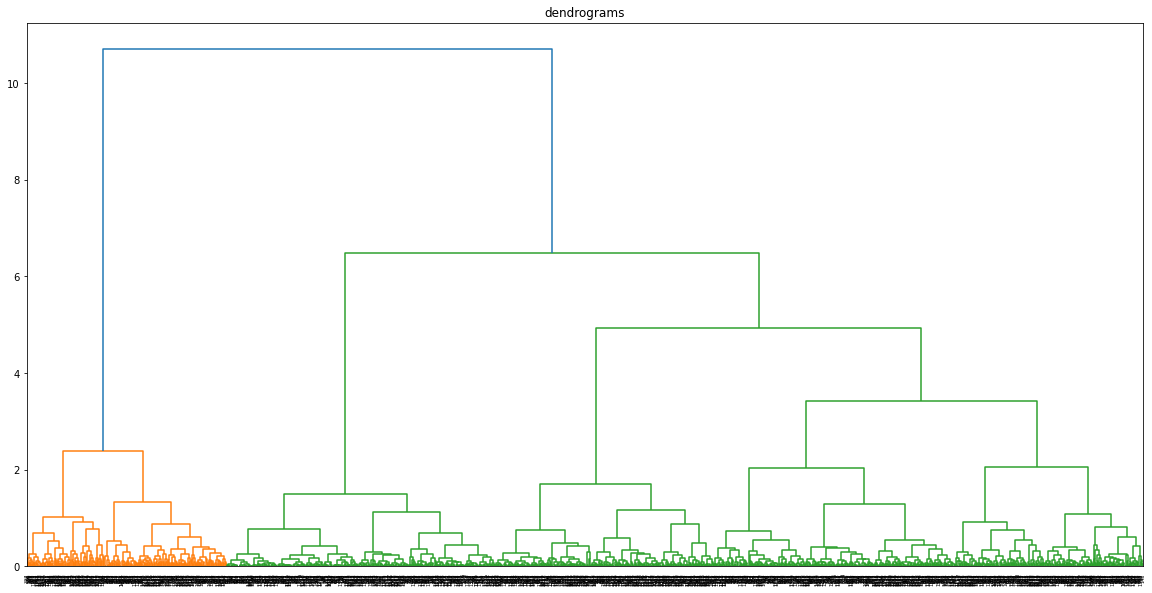

In [55]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,10))
plt.title("dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled, method='ward'))

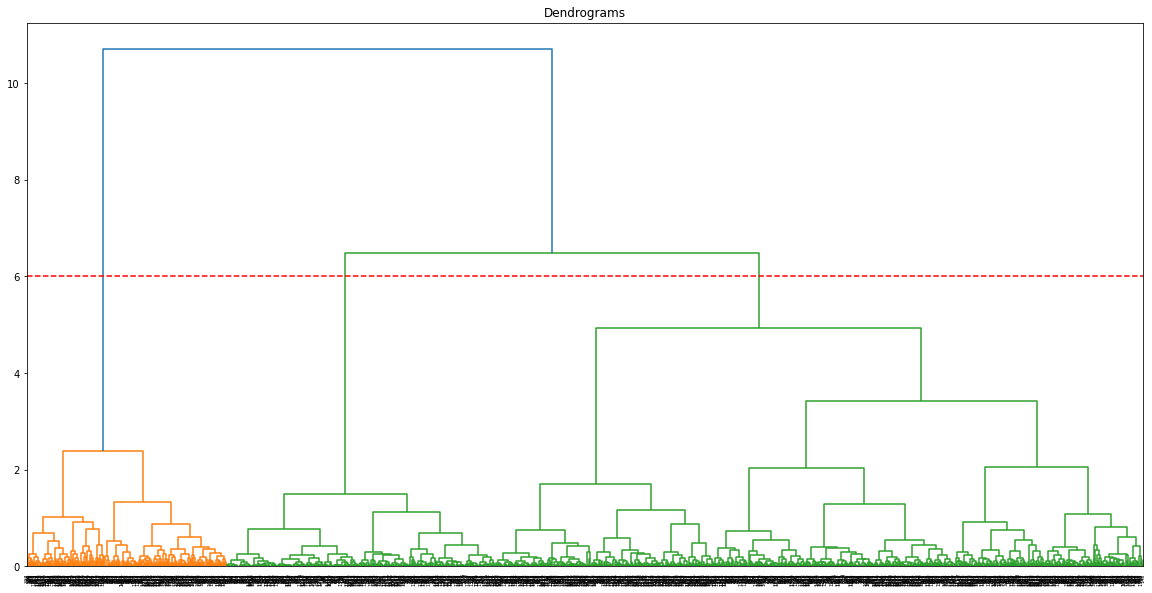

In [56]:
plt.figure(figsize=(20,10))
plt.title("Dendrograms")
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [57]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2, affinity='euclidean',
                               linkage = 'ward')
cluster.fit_predict(data_scaled)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

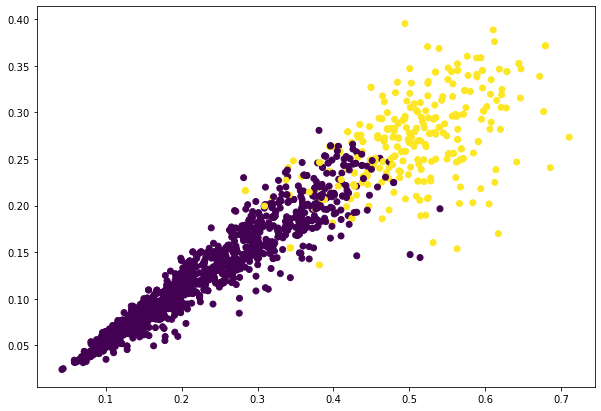

In [58]:
plt.figure(figsize=(10,7))
plt.scatter(data_scaled['alcohol'], data_scaled['quality'],c=cluster.labels_)

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    1. Simpulan perbandingan dataset
     - Dataset 1 melakukan hierarki klusterisasi dengan Agglomerative Clustering. Sedangkan, dataset 2 melakukan hierarki klusterisasi dengan Dendrogram.
     - Dataset 1 dapat melakukan klusterisasi baik itu data numerik dan kategorik. Dataset 2 melakukan klusterisasi terhadap data numerik dikarenakan menggunakan Dendrogram.
     - Berdasarkan Dendogram pada dataset 1, cluster yang cukup optimal adalah 1.
     
    2. Hasil akurasi yang diberikan (jika ada dalam modul)
     - Berdasarkan bar plot data kategorik dataset 1 maka terdapat beberapa hal yaitu:
       1. Kebakaran hutan lebih banyak terjadi pada bulan Agustus
       2. Kebakaran hutan lebih sering terjadi pada hari Minggu
     - Berdasarkan hasil heatmap, korelasi terbaik terdapat pada antara DC dan DMC.
     - Proyeksi 3D pada dataset 1 menunjukkan bahwa dua dari tiga data yang diproyeksikan tercampur antara satu sama lain atau tumpang tindih
     - Jika Dendrogram dipotong pada dataset 2, maka hanya akan menghasilkan 1 cluster saja.
     
    3. Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.
     - Agglomerative Clustering adalah metode pengelompokan data yang dimulai dengan setiap satu pengamatan sebagai clusternya sendiri kemudian terus mengelompokkan pengamatan ke dalam kelompok yang semakin besar.
     - Agglomerative Clustering dimulai dengan setiap titik di clusternya sendiri. Kemudian melakukan identifikasi dua cluster terdekat dan melakukan penggabungan. Proses dilakukan secara berulang dan berakhir ketika semua titik berada dalam satu cluster.
     - Transformasi logaritmik dapat digunakan untuk mengurangi outlier dan distribution skewness.
     - Dendrogram adalah diagram grafik yang merangkum proses pengelompokan hierarki yang menunjukkan perubahan evolusioner.
     - Dendrogram sangat penting karena menunjukkan hubungan antara kumpulan data yang serupa.
     - Normalisasi data perlu dilakukan dahulu sebelum melakukan hierarki klusterisasi dikarenakan untuk menyamakan skala variabel yang ada pada dataset agar model tidak bias terhadap model variabel yang besarannya lebih tinggi

In [59]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Gempar Bambang Godata
NIM: 	00000056133
Time-stamp:	2023-05-04 21:56:52.878921


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [60]:
!jupyter nbconvert --to html "./IF540L_Kelas_A_laporan_M10_00000067643_Gempar Bambang Godata.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540L_Kelas_A_laporan_M10_00000067643_Gempar Bambang Godata.ipynb to html
[NbConvertApp] Writing 1317518 bytes to IF540L_Kelas_A_laporan_M10_00000067643_Gempar Bambang Godata.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#